<a href="https://colab.research.google.com/github/leonaardobrito/data-mining/blob/main/Solu%C3%A7%C3%A3o_Exerc%C3%ADcio_Decision_Trees_Detec%C3%A7%C3%A3o_de_Notas_Falsas_INE5644.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exercício - Decision Trees - Detecção de notas falsas
Disciplina de Data Mining - INE5644 - INE/UFSC

Prof. Jônata Tyska Carvalho



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
%matplotlib inline

### 0. Carregamento do conjunto de dados

informações sobre os dados em: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

imagens 400x400 - features extraídas usando transformadas wavelet

In [ ]:
url = "https://codigos.ufsc.br/jonata.tyska/repositorio/-/raw/master/datasets/bill_authentication.csv"

# Read dataset to pandas dataframe
dataset = pd.read_csv(url)

dataset.shape

(1372, 5)

**1. Visualizar algumas instâncias do conjunto de dados**

In [ ]:
dataset.head(15)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


**2. Visualizar medidas de estatística descritiva de cada um dos atributos do conjunto de dados**

In [ ]:
dataset.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


**3. Dividir o conjunto de dados em atributos (X) e variável alvo (y)**

In [ ]:
entrada = ['Variance','Skewness','Curtosis','Entropy']
Y = dataset['Class']
X = pd.DataFrame(dataset, columns = entrada)

**4. Dividir o conjunto de dados em treino e teste (X_train,y_train,X_test,y_test)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42,stratify=Y)

**5. Construir o modelo usando o conjunto de dados de treinamento**

In [ ]:
model = DecisionTreeClassifier(criterion='gini')

**6. Realiza a predição usando o conjunto de teste (X_test)**

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**7. Avalie o desempenho do modelo construído (usando o y_test e o y_pred)**

In [ ]:
y_previsto = model.predict(X_test) 
acuracia = accuracy_score(y_test, y_previsto)
print('Acurácia da árvore de Decisão: ',acuracia)

Acurácia da àrvore de Decisão:  0.9889624724061811


In [ ]:
matriz_confusao = confusion_matrix(y_test, y_previsto)
print(matriz_confusao)

[[249   3]
 [  2 199]]


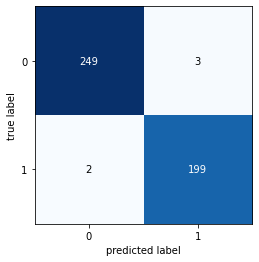

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()